In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

cats = ["sci.crypt", "sci.electronics", "sci.med", "sci.space"]

newsgroups_train = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'), categories=cats)

vectorizer = TfidfVectorizer()
vecs_train = vectorizer.fit_transform(newsgroups_train.data)
vecs_test = vectorizer.transform(newsgroups_test.data)

clf = MultinomialNB(alpha=.01)
clf.fit(vecs_train, newsgroups_train.target)

pred = clf.predict(vecs_test)
metrics.f1_score(newsgroups_test.target, pred, average="macro")

0.8461607416404733

In [13]:
import pandas as pd
import numpy as np

nans = ["NO CLUE", "N/A", "0"]
requests_data = pd.read_csv("../data/311-service-requests.csv", na_values=nans, dtype={"Incident Zip" : str})


def uniform_zips(codes): 
    codes = codes.str.slice(0, 5)
    
    zeros = codes == '00000'
    codes[zeros] = np.nan
    
    return codes


requests_data["Incident Zip"] = uniform_zips(requests_data["Incident Zip"])

requests_data["Incident Zip"].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import re

#Seed based on the last name 'Gürtler': 876
#Sorted list of 15 unique random numbers from 1 to 58: [2, 3, 6, 13, 17, 20, 27, 30, 36, 37, 46, 47, 51, 57, 58]


def a_zero_more_b_2(text):
    return re.search("^a(b*)$", text) != None


def a_one_more_b_3(text):
    return re.search("a(b+)", text) != None
    

def a_two_three_b_6(text):
    return re.search("a(b{2,3})", text) != None


def contains_z_13(text):
    return re.search("\w*z\w*", text) != None


def end_number_17(text):
    return re.findall("\d$", text) != None


def pattern_loc_20(pattern, text):
    target = re.search(pattern, text)
    if not target:
        print("no matches found")
    else:
        return (target.start(), target.end())


def separate_nums_27(text):
    target = re.split("\D+", text)
    if not target:
        print("no matches")
    else:
        return target


def shorten_road_30(text):
    target = re.sub("Road", "Rd.", text)
    if not target:
        print("no matches")
    else:
        return target


def camel_to_snake_36(text):
    target = re.sub("(.)([A-Z])", r"\1_\2", text)
    if not target:
        print("no matches")
    else:
        return target.lower()


def snake_to_camel_37(text):
    target = [word.capitalize() for word in text.split("_")]
    return "".join(target)


def find_adverbs_naive_46(text):
    target = re.finditer(r"\w+ly\b", text)
    if not target:
        print("no matches")
    else:
        return [(adverb.start(), adverb.end(), adverb.group()) for adverb in target]


def split_multi_delim_47(delims, text):
    target = re.split("|".join(delims), text)
    if not target:
        print("no matches")
    else:
        return target


def add_spaces_51(text):
    target = re.sub("(.)([A-Z])", r"\1 \2", text)
    if not target:
        print("no matches")
    else:
        return target


def start_end_vowel_57(text):
    return re.findall("^[aeiou].*[aeiou]$", text) != None


def end_start_vowel_58(text):
    return re.findall("[AEIOUaeiou] [AEIOUaeiou]", text) != None


a_zero_more_b_2("abbb")
a_one_more_b_3("babcb")
a_two_three_b_6("abbca")
contains_z_13("to azebzzzra tzo")
end_number_17("adasd0 asdas1")
pattern_loc_20("fox", "The quick brown fox jumps over the lazy dog.")
separate_nums_27("123a6asd asdas 122")
shorten_road_30("asdas Road asdasdRoad")
camel_to_snake_36("AmmmmBmmmmmCmmmm")
snake_to_camel_37("ammm_bmmm_90mmm")
find_adverbs_naive_46("clearly, alll sdasd clearlyasd asdasd obviously")
split_multi_delim_47([" ", ",", "/", ","], "asd asdas/asdas,asdasd. asda")
add_spaces_51("AasdasdJsaddfjnIasdasd.Asadasd")
start_end_vowel_57("Red Orange White")
end_start_vowel_58("I use these stories in my classroom.")

True

True

True

True

True

(16, 19)

['123', '6', '122']

'asdas Rd. asdasdRd.'

'ammmm_bmmmmm_cmmmm'

'AmmmBmmm90mmm'

[(0, 7, 'clearly'), (38, 47, 'obviously')]

['asd', 'asdas', 'asdas', 'asdasd.', 'asda']

'Aasdasd Jsaddfjn Iasdasd. Asadasd'

True

True

Text(0.5, 1.0, 'attack distribution by type')

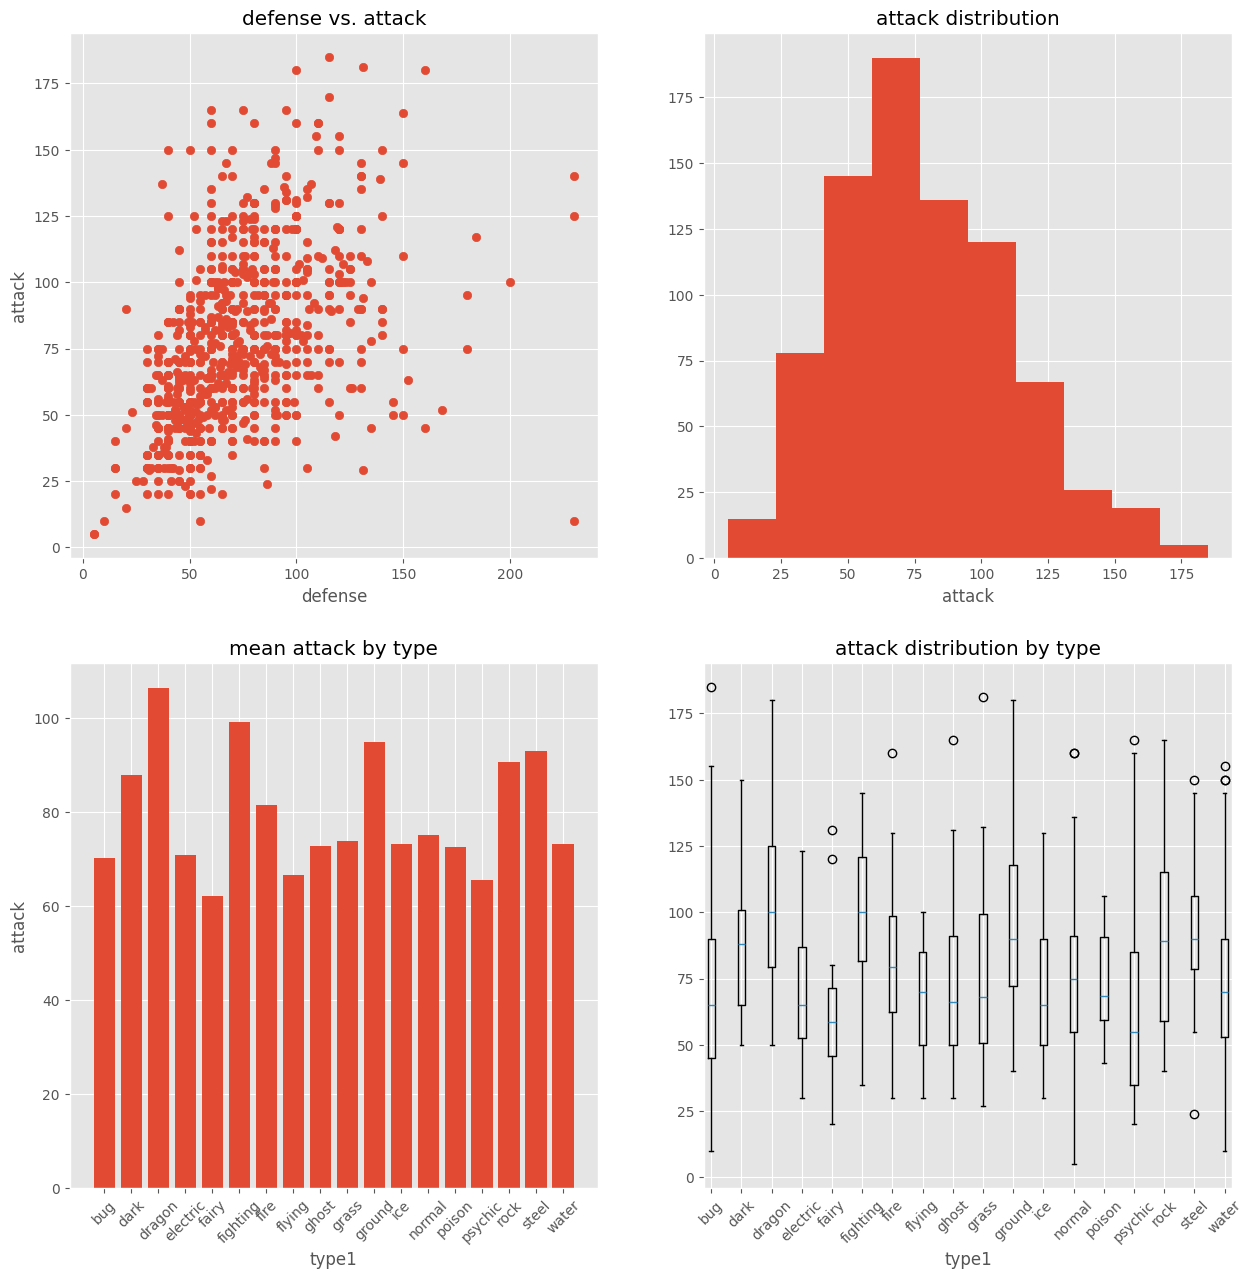

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'
import pandas as pd
import matplotlib.pyplot as plt

pokemon_data = pd.read_csv("../data/pokemon.csv")

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].scatter(pokemon_data["defense"], pokemon_data["attack"])
axs[0, 0].set_xlabel("defense")
axs[0, 0].set_ylabel("attack")
axs[0, 0].set_title("defense vs. attack")

axs[0, 1].hist(pokemon_data["attack"])
axs[0, 1].set_xlabel("attack")
axs[0, 1].set_title("attack distribution")

mean_attack_by_type = pokemon_data.groupby("type1")["attack"].mean().reset_index()

axs[1, 0].bar(mean_attack_by_type["type1"], mean_attack_by_type["attack"])
axs[1, 0].set_xticks(range(len(mean_attack_by_type["type1"])))
axs[1, 0].set_xticklabels(mean_attack_by_type["type1"], rotation=45)
axs[1, 0].set_xlabel("type1")
axs[1, 0].set_ylabel("attack")
axs[1, 0].set_title("mean attack by type")

types = sorted(pokemon_data["type1"].unique())
attack_by_type1 = [pokemon_data[pokemon_data['type1'] == t]['attack'] for t in types]

axs[1, 1].boxplot(attack_by_type1, positions=range(1, len(types) * 2, 2), labels=types)
axs[1, 1].set_xticklabels(types, rotation=45)
axs[1, 1].set_xlabel("type1")
axs[1, 1].set_title("attack distribution by type")

In [40]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import RegexpParser

moby_dick_text = "That night, in the mid-watch, when the old man—as his wont at intervals—steppedforth from the scuttle in which he leaned, \
    and went to his pivot-hole, he suddenlythrust out his face fiercely, snuffing up the sea air as a sagacious ship's dog will, \
    indrawing nigh to some barbarous isle. He declared that a whale must be near. Soon thatpeculiar odor, sometimes to a great \
    distance given forth by the living sperm whale,was palpable to all the watch; nor was any mariner surprised when, after \
    inspectingthe compass, and then the dog-vane, and then ascertaining the precise bearing of theodor as nearly as possible, \
    Ahab rapidly ordered the ship's course to be slightly altered,and the sail to be shortened."

# nltk.download(["punkt", "stopwords", "wordnet"])

moby_dick_tokenized = word_tokenize(moby_dick_text, language="english")

moby_dick_no_stop = [t for t in moby_dick_tokenized if t not in stopwords.words("english")]

stemmer = PorterStemmer()
moby_dick_stemmed = [stemmer.stem(t) for t in moby_dick_no_stop]

lemmatizer = WordNetLemmatizer()
moby_dick_lemmatized = [lemmatizer.lemmatize(t) for t in moby_dick_no_stop]

moby_dick_pos = pos_tag(moby_dick_tokenized)

grammar = """
    NP: {<DT>?<JJ>*<NN>}
    VP: {<VB.*><NP|PP|CLAUSE>+$}
    CLAUSE: {<NP><VP>}
    PP: {<IN><NP>}
"""
chunker = RegexpParser(grammar)
moby_dick_tree = chunker.parse(moby_dick_pos)
moby_dick_tree.draw()

In [50]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

spacy_tokens = nlp(moby_dick_text)

spacy_no_stop = [t for t in spacy_tokens if not t.is_stop]

spacy_lemmatized = [t.lemma_ for t in spacy_no_stop]

spacy_pos = [(t, t.tag_) for t in spacy_no_stop]

displacy.render(spacy_tokens, style="dep", jupyter=True)

In [64]:
from gensim.utils import simple_preprocess
from gensim import corpora

gensim_tokens = simple_preprocess(moby_dick_text)

# No, gensim is usually used for topic modeling and other tools might be more fit for tokenization, lemmatization and stop word removal.

gensim_dict = corpora.Dictionary([gensim_tokens])
gensim_bow = gensim_dict.doc2bow(gensim_tokens)

# using gensim version 4.3.2 where summarization module is deprecated.
# An alternative extractive summarizer is bert-extractive-summarizer, but it takes some time and memory space
# !pip install bert-extractive-summarizer
from summarizer import Summarizer

bert_summarizer = Summarizer()
summary = bert_summarizer(moby_dick_text)
print(summary)

config.json: 100%|██████████| 571/571 [00:00<00:00, 981kB/s]
model.safetensors: 100%|██████████| 1.34G/1.34G [01:58<00:00, 11.4MB/s]
tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 110kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 904kB/s]
tokenizer.json: 100%|██████████| 466k/466k [00:00<00:00, 2.08MB/s]
/home/wolfingten/.python_environments/ML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
from textblob import TextBlob

textblob_tokens = TextBlob(moby_dick_text)

# Yes, each TextBlob.words is an object with methods for stopword removal, lemmatization and stemming.

textblob_tokens.tags

textblob_tokens.sentiment

Sentiment(polarity=0.14814814814814814, subjectivity=0.6240740740740741)